<a href="https://colab.research.google.com/github/cocoisland/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [51]:
X=df[df.columns]
X=X.drop(['price'], axis=1)
y=df.price
print('y shape :',y.shape)
print('X shape :', X.shape)
X.head()

y shape : (8495,)
X shape : (8495, 8)


,make,body,mileage,engV,engType,registration,year,drive
0,23,0,68,2.5,1,1,2010,1
1,50,3,173,1.8,1,1,2011,2
2,50,2,135,5.5,3,1,2008,2
3,50,5,162,1.8,0,1,2012,0
4,55,0,83,2.0,3,1,2013,1


## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [53]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [54]:
# Coefficients
beta_0 = model.intercept_
beta_i = model.coef_

print('Intercept: ', beta_0)
print('Coefficient Values:', beta_i)

Intercept:  -2184591.0115608736
Coefficient Values: [  -35.22479484 -1672.11973555   -37.12848399   269.61582544
 -1284.74375962  4649.46225339  1098.2829573   7886.89079148]


## 1.5 Use the test data to make predictions

In [0]:
Y_test_predicted = model.predict(X_test)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [56]:
MSE = mean_squared_error(Y_test, Y_test_predicted)
RMSE = (np.sqrt(mean_squared_error(Y_test, Y_test_predicted)))
print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, Y_test_predicted)
print('R^2 is {}'.format(R2))

MSE is 504905647.2241802
RMSE is 22470.10563446866
R^2 is 0.2694482951962195


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The year coefficient is 1098.2829573. This means for every one year changes in X observation, there is 1098.28 value impact on y predicted price.

## 1.8 How should we interpret the Root-Mean-Square Error?

Mean Square Error is summing up all the errors derived by substracting y test from y predicted, then squaring the substraction to remove any negative value and finally divided by number of observations to get the means.

Root-Mean-Square is applying square root to bring down the enlargement effect of squaring in the Mean-Square-Error process.

Quoted from.

[Precision and Bias](http://www.statisticalengineering.com/Weibull/precision-bias.html)
Bias is the average difference between the estimator and the true value.  Precision is the standard deviation of the estimator.  One measure of the overall variability is the Mean Squared Error, MSE, which is the average of the individual squared errors.  The MSE is also the sum of the square of the precision and the square of the bias,  Mean Squared Error, so the overall variability, in the same units as the parameter being estimated, is the Root Mean Squared Error, Root Mean Squared Error.   Often the overall variability of a biased estimator is smaller than that for an unbiased estimator,

## 1.9 How should we interpret the $R^2$?

R2 is the square of the coefficient of multiple correlation. It is the squaring of the proportional variance in the dependent y test from independent y predicted value. 

High R2 would likely indicates the predicted y output from the model is closely correlated to the true value y test values. It could mean accurate predictions or overfitting the Linear regression model.


# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
y_log = np.log(y)

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

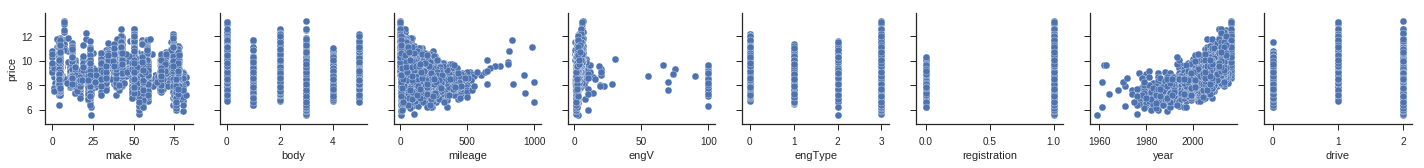

In [58]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers
x_columns = X.columns

X1 = X.copy()
X1['price']=y_log

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=X1, y_vars=['price'], x_vars=x_columns)

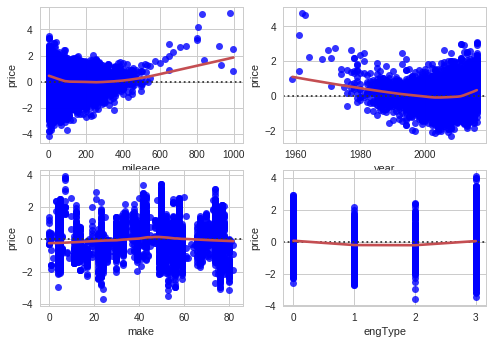

In [59]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.residplot(X['mileage'], y_log, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(X['year'], y_log, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(X['make'], y_log, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(X['engType'], y_log, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})

## 2.3 If appropriate, create any polynomial features. 

In [0]:
X['mileage_sq']=X['mileage']**2
X['year_sq']=X['year']**2

In [0]:
# to avoid high collinearity between mileage vs mileage_sq, year vs year_sq
#X.drop(['mileage','year'], axis=1, inplace=True)

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y_log, test_size=.5, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

intercept = model.intercept_
coef = model.coef_

print('Intercept: ', intercept)
print('Coefficient Values:', coef)
print('\n')
MSE = mean_squared_error(Y_test, Y_test_predicted)
RMSE = (np.sqrt(mean_squared_error(Y_test, Y_test_predicted)))
print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, Y_test_predicted)
print('R^2 is {}'.format(R2))

Intercept:  6367.884923503175
Coefficient Values: [-1.60668375e-03 -8.64387922e-02  9.84119698e-04  9.60759460e-03
 -4.80294292e-02  6.72177364e-01 -6.45583602e+00  3.83372383e-01
 -6.05343073e-07  1.63788682e-03]


MSE is 401703085.4794668
RMSE is 20042.531912896306
R^2 is -426683043.5545585


In [62]:
X.columns

Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive', 'mileage_sq', 'year_sq'],
      dtype='object')

## 2.5 How might we interpret the coefficient on "year" in this new regression model?

The new coefficient of the new year_sq, is much smaller 1.63e-03 than the original year 1098.

Linear Regression model tries to correlate y predicted output values with respect to y test value, by causing the new year_sq coefficient very small to compensate for the very large value of year_sq.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient Descent seek to minimize the error of the function with respect to producing y predicted value output to better correlate with the true y test value.

## 3.2 What is the "Learning Rate" and what is its function?

Learning rate is a constant used to adjust the number of iterations of computing the cost functions until the cost functions return minimum cost reduction benefits.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [63]:
X = sm.add_constant(X)

model = sm.OLS(y_log, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1693.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:06:02   Log-Likelihood:                -6963.9
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8484   BIC:                         1.403e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6524.4284    685.467      9.518   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [64]:
print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'mileage_sq', 'year_sq'],
      dtype='object') 


[3417162393.281383, 1.060435781512386, 1.1700158474025166, 7.512926111847467, 1.010581750735653, 1.1717643635385866, 1.1087266992867202, 164006.04096347353, 1.140498591899409, 5.067267264795855, 164341.01383629531]


Yes, the const of all ones have high multicollinearity with all the features.

Year and year_sq has high multicollinearity.

Mileage and mileage_sq has high multicollinearity even though it is not seen above. Once the const and year are dropped, the high multicollinearity will manifest.
